In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_segmentation(mask):
    cv2.imshow('Segmentation Process', mask)
    cv2.waitKey(1)  

def region_growing(image, seed_points, threshold_range):
    mask = np.zeros_like(image, dtype=np.uint8)
    
    queue = list(seed_points)
    
    iteration = 0
    
    while queue:
        iteration += 1
        current_point = queue.pop(0)
        current_value = image[current_point[1], current_point[0]]
        mask[current_point[1], current_point[0]] = 255
        
        if iteration % 10 == 0:
            show_segmentation(mask)
        
        for i in range(-1, 2):
            for j in range(-1, 2):
                if i == 0 and j == 0:
                    continue
                
                x = current_point[0] + i
                y = current_point[1] + j
                
                if 0 <= x < image.shape[1] and 0 <= y < image.shape[0]:
                    neighbor_value = image[y, x]
                    if abs(int(neighbor_value) - int(current_value)) <= threshold_range and mask[y, x] == 0:
                        queue.append((x, y))
                        mask[y, x] = 255
                        
    return mask


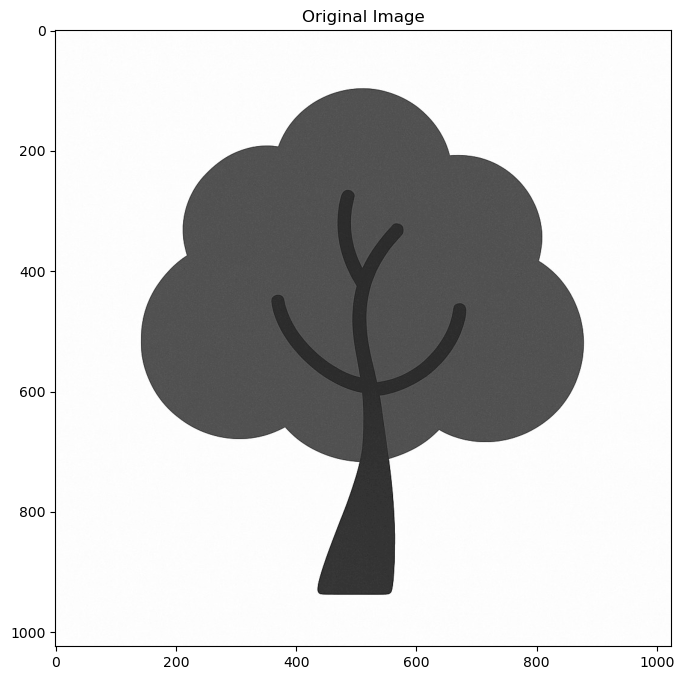

In [16]:
image = cv2.imread('a.jpg', cv2.IMREAD_GRAYSCALE)


img = cv2.imread('a.jpg')
image_c = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

plt.figure(figsize=(8,8))
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('on')
plt.show()


Seed points are: [(500, 900), (500, 400), (700, 600)]


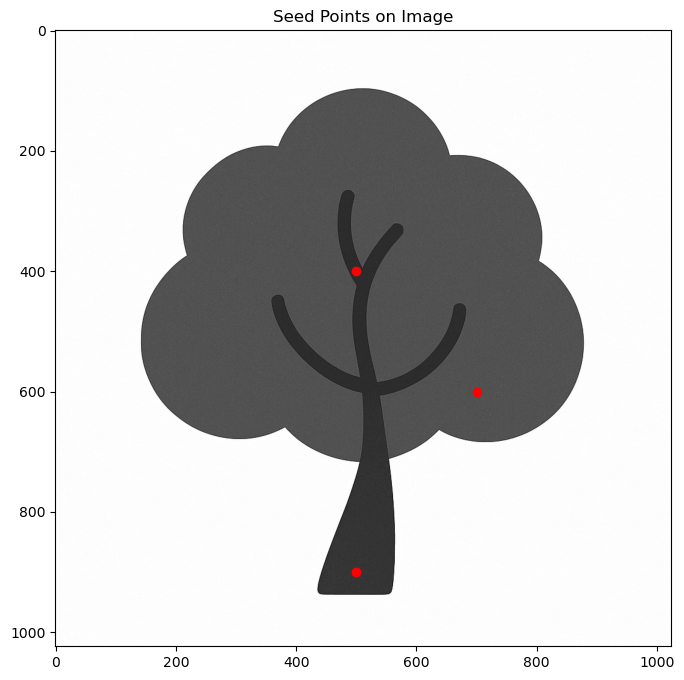

In [13]:

seed_points = [(500, 900), (500, 400), (700, 600)]
threshold_range = 10 
print(f"Seed points are: {seed_points}")

plt.figure(figsize=(8,8))
plt.imshow(image, cmap='gray')
for (x,y) in seed_points:
    plt.plot(x, y, 'ro')  # red dot for seeds
plt.title('Seed Points on Image')
plt.axis('on')
plt.show()



In [ ]:
segmented_image = region_growing(image, seed_points, threshold_range)

cv2.destroyAllWindows()

plt.figure(figsize=(8,8))
plt.title('Original Image')
plt.imshow(image_c)
plt.axis('off')
plt.show()


plt.figure(figsize=(8,8))
plt.imshow(segmented_image, cmap='gray')
plt.title('Final Segmented Output')
plt.axis('off')
plt.show()
